In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import locale

### Checkpoint 1: Data Cleaning

**Import Company master CSV with correct decoding format**

In [2]:
companies = pd.read_csv('companies.csv',encoding = "ISO-8859-1")

In [3]:
companies.shape

(66368, 10)

In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [6]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

**Import Investment master - Round 2 CSV in correct decoding format**

In [7]:
investments = pd.read_csv('rounds2.csv',encoding = "ISO-8859-1")

In [8]:
investments.shape

(114949, 6)

In [9]:
investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [10]:
investments.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [11]:
investments.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

**Data set has some international chars. This step is added based on observation in Ln 31 in data cleaning where observed companies mismatch in round2 and companies csv**

In [12]:
companies['permalink'] = companies['permalink'].apply(lambda x: x.encode("ascii",errors='ignore').decode("ascii"))

In [13]:
investments['company_permalink'] = investments['company_permalink'].apply(lambda x: x.encode("ascii",errors='ignore').decode("ascii"))

**Matching cases for keys for dataframe**

In [14]:
investments['company_permalink'] = investments['company_permalink'].apply(lambda x : x.casefold().strip())

In [15]:
investments.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [16]:
companies['permalink'] = companies['permalink'].apply(lambda x : x.casefold().strip())

In [17]:
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


**How many unique companies present in Round 2**

In [18]:
investments.company_permalink.nunique()

66368

**How many unique companies present in companies file**

In [19]:
companies.permalink.nunique()

66368

**In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.**

In [20]:
companies.shape

(66368, 10)

In [21]:
companies.permalink.nunique()

66368

**Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.**

In [22]:
companies.permalink.nunique()

66368

In [23]:
investments.company_permalink.nunique()

66368

In [24]:
companies.permalink.value_counts()

/organization/dishcrawl               1
/organization/honk-2                  1
/organization/vericept                1
/organization/ncpc-enterprises-llc    1
/organization/evntlive                1
                                     ..
/organization/jmdedu-com              1
/organization/youmail                 1
/organization/qreativ-studio          1
/organization/mapmyid                 1
/organization/youdata                 1
Name: permalink, Length: 66368, dtype: int64

In [25]:
investments.company_permalink.value_counts()

/organization/solarflare                      19
/organization/quellan                         18
/organization/semprius                        18
/organization/exagen-diagnostics              18
/organization/vocalocity                      17
                                              ..
/organization/latam-autos                      1
/organization/smart-start                      1
/organization/friendsy                         1
/organization/xiao-fu-financial-accounting     1
/organization/youdata                          1
Name: company_permalink, Length: 66368, dtype: int64

**Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?**

In [26]:
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [27]:
investments.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [28]:
master_frame = pd.merge(left=investments,right=companies,how='left',left_on='company_permalink',right_on='permalink')

In [29]:
master_frame.shape

(114949, 16)

In [30]:
master_frame.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


**Checking if dataframe dont have matching companies info**

In [31]:
master_frame[master_frame['company_permalink']!=master_frame['permalink']]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


**Seems mismatch record has International Chars.. Will add step to clean earlier in analysis.**
 - companies['permalink'] = companies['permalink'].apply(lambda x: x.encode("ascii",errors='ignore').decode("ascii"))

**Checking further data cleaning possibility**

In [32]:
master_frame.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

**Removing columns with higher NA values and containing same info and may not be required for current analysis**

In [33]:
master_frame.drop(columns=['funding_round_code','state_code','region','city','founded_at','permalink'],axis=0,inplace=True)

In [34]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funded_at                114949 non-null  object 
 4   raised_amount_usd        94959 non-null   float64
 5   name                     114948 non-null  object 
 6   homepage_url             108815 non-null  object 
 7   category_list            111539 non-null  object 
 8   status                   114949 non-null  object 
 9   country_code             106271 non-null  object 
dtypes: float64(1), object(9)
memory usage: 9.6+ MB


In [35]:
master_frame.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
dtype: int64

**Need to check handling for null category_list in later phase**

### Checkpoint 2: Funding Type Analysis

In [36]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN


**Analyzing investment type column**

In [37]:
master_frame['funding_round_type'].isnull().sum()

0

In [38]:
master_frame['funding_round_type'].value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [39]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funded_at                114949 non-null  object 
 4   raised_amount_usd        94959 non-null   float64
 5   name                     114948 non-null  object 
 6   homepage_url             108815 non-null  object 
 7   category_list            111539 non-null  object 
 8   status                   114949 non-null  object 
 9   country_code             106271 non-null  object 
dtypes: float64(1), object(9)
memory usage: 9.6+ MB


In [40]:
master_frame.raised_amount_usd.isnull().sum()

19990

**Group by round type**

In [41]:
investmentTypeGroup = master_frame.groupby(by='funding_round_type')

**Most representative value of each group will be median**

In [42]:
round(investmentTypeGroup['raised_amount_usd'].median()/1000000,2).sort_values(ascending=False)

funding_round_type
secondary_market         32.60
private_equity           20.00
post_ipo_debt            19.95
post_ipo_equity          12.26
venture                   5.00
debt_financing            1.10
undisclosed               1.02
angel                     0.40
seed                      0.28
convertible_note          0.27
grant                     0.20
product_crowdfunding      0.18
equity_crowdfunding       0.10
non_equity_assistance     0.06
Name: raised_amount_usd, dtype: float64

In [43]:
investmentTypeGroup['raised_amount_usd'].count().sort_values(ascending=False)

funding_round_type
venture                  50228
seed                     23603
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: raised_amount_usd, dtype: int64

**Plotting distribution of investments within each category to get sense of how much other investors prefer to invest in each category**

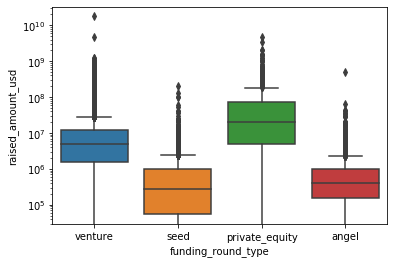

In [44]:
g =sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=master_frame[master_frame.funding_round_type.isin(['angel','seed','venture','private_equity'])])
g.set_yscale("log")

### Based on above results and SPARK wants to invest inbetween 5-15 M dollar per round, Venture investment type seems to be best suited

**Filtering based on investtype = venture**

In [45]:
master_frame_invtype = master_frame[master_frame['funding_round_type']=='venture']

In [46]:
master_frame_invtype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55494 entries, 0 to 114946
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        55494 non-null  object 
 1   funding_round_permalink  55494 non-null  object 
 2   funding_round_type       55494 non-null  object 
 3   funded_at                55494 non-null  object 
 4   raised_amount_usd        50228 non-null  float64
 5   name                     55494 non-null  object 
 6   homepage_url             52549 non-null  object 
 7   category_list            54362 non-null  object 
 8   status                   55494 non-null  object 
 9   country_code             52619 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.7+ MB


In [47]:
master_frame_invtype.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA


### Checkpoint 3: Country Analysis

**Checking top 9 countries with maximum investment amount for specified investment type**

In [48]:
countrygroup = master_frame_invtype.groupby(by='country_code')

In [49]:
round(countrygroup['raised_amount_usd'].sum()/1000000,2).sort_values(ascending=False).head(9)

country_code
USA    422510.84
CHN     39835.42
GBR     20245.63
IND     14391.86
CAN      9583.33
FRA      7259.54
ISR      6907.51
DEU      6346.96
JPN      3363.68
Name: raised_amount_usd, dtype: float64

**Creating dataframe for TOP 9 countries with max investment amount for specified investment type**

In [50]:
top9 = master_frame_invtype[master_frame_invtype.country_code.isin(countrygroup['raised_amount_usd'].sum().sort_values(ascending=False).head(9).index)]

In [51]:
top9.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA


In [52]:
top9['country_code'].unique()

array(['IND', 'USA', 'CHN', 'CAN', 'GBR', 'FRA', 'JPN', 'DEU', 'ISR'],
      dtype=object)

**Out of Above, Countries where English is official language and have highest total investment amount for Venture investment type are -** 
- USA
- GBR
- IND

###  Checkpoint 4: Sector Analysis 1

In [53]:
top3 = top9[top9.country_code.isin(['USA','GBR','IND'])]

In [54]:
top3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41667 entries, 0 to 114936
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        41667 non-null  object 
 1   funding_round_permalink  41667 non-null  object 
 2   funding_round_type       41667 non-null  object 
 3   funded_at                41667 non-null  object 
 4   raised_amount_usd        39018 non-null  float64
 5   name                     41667 non-null  object 
 6   homepage_url             39706 non-null  object 
 7   category_list            41283 non-null  object 
 8   status                   41667 non-null  object 
 9   country_code             41667 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.5+ MB


In [55]:
sector_mp = pd.read_csv('mapping.csv')

In [56]:
sector_mp.head(2)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0


In [57]:
sector_mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [58]:
top3.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA


In [59]:
top3['category_list'].isnull().sum()

384

**Cleaning Data after consulting with business and adding new column for cleaned data**

In [60]:
top3['main_category_list'] = top3['category_list'].apply(lambda x : str(x).strip().split('|')[0])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
top3.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,main_category_list
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,Application Platforms
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,Software
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,Analytics


In [62]:
sector_mp.head(2)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0


**Adding new categorial column to tag each record to main_sector**

In [63]:
sector_mp['main_sector'] = sector_mp[sector_mp.columns[1:]].apply(
    lambda x: x.index[x==1][0],
    axis=1)


In [64]:
sector_mp.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,NaN,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [65]:
sector_mp['category_list']=sector_mp['category_list'].apply(lambda x: str(x).lower().strip())

In [66]:
top3['main_category_list']=top3['main_category_list'].apply(lambda x: str(x).lower().strip())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
sector_mp['main_sector'].value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Blanks                                       1
Name: main_sector, dtype: int64

**Cleaning data for category list. Observed in further flow that without cleaning, categorization not happening properly so need to correct in this step**

In [68]:
sector_mp['category_list'] = sector_mp['category_list'].apply(lambda x: str(x).replace('0','na'))

In [69]:
##merging to main dataframe and later will clean up unnecessary columns
final = pd.merge(top3,sector_mp,how='left',left_on='main_category_list', right_on='category_list')

In [70]:
final.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"News, Search and Messaging"
2,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Others
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"Social, Finance, Analytics, Advertising"


In [71]:
final = final.drop(columns=['Automotive & Sports','Blanks','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising','category_list_y'])

In [72]:
final.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,main_category_list,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,application platforms,"News, Search and Messaging"
2,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,software,Others
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"


In [73]:
final = final.rename(columns={"category_list_x": "category_list"})

In [74]:
final.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,main_category_list,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,application platforms,"News, Search and Messaging"
2,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,software,Others
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"


In [75]:
final['main_sector'].value_counts()

Others                                     9675
Cleantech / Semiconductors                 8797
Social, Finance, Analytics, Advertising    8496
News, Search and Messaging                 5037
Health                                     3595
Manufacturing                              2839
Entertainment                              2177
Automotive & Sports                         652
Blanks                                      384
Name: main_sector, dtype: int64

In [76]:
final['main_sector'].isnull().sum()

15

In [77]:
final[final.main_sector.isnull()].main_category_list.value_counts()

enterprise 2.0                     4
retirement                         2
adaptive equipment                 2
greentech                          1
product search                     1
rapidly expanding                  1
specialty retail                   1
biotechnology and semiconductor    1
racing                             1
natural gas uses                   1
Name: main_category_list, dtype: int64

In [78]:
final.main_sector.value_counts()

Others                                     9675
Cleantech / Semiconductors                 8797
Social, Finance, Analytics, Advertising    8496
News, Search and Messaging                 5037
Health                                     3595
Manufacturing                              2839
Entertainment                              2177
Automotive & Sports                         652
Blanks                                      384
Name: main_sector, dtype: int64

In [79]:
final[final.main_sector.isnull()].main_category_list.value_counts()

enterprise 2.0                     4
retirement                         2
adaptive equipment                 2
greentech                          1
product search                     1
rapidly expanding                  1
specialty retail                   1
biotechnology and semiconductor    1
racing                             1
natural gas uses                   1
Name: main_category_list, dtype: int64

**Imputing values based on domain knowledge**

In [80]:
final.loc[final.main_category_list.
     isin(['greentech','natural gas uses','biotechnology and semiconductor']),'main_sector']='Cleantech / Semiconductors'

In [81]:
final.loc[final.main_category_list.
     isin(['specialty retail']),'main_sector']='Social, Finance, Analytics, Advertising'

In [82]:
final.loc[final.main_category_list.
     isin(['product search']),'main_sector']='News, Search and Messaging'

In [83]:
final.loc[final.main_category_list.
     isin(['racing']),'main_sector']='Automotive & Sports'

In [84]:
final.loc[final.main_category_list.
     isin(['enterprise 2.0','rapidly expanding']),'main_sector']='Others'

In [85]:
final.loc[final.main_category_list.
     isin(['adaptive equipment','retirement']),'main_sector']='Health'

In [86]:
final[final.main_sector.isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,main_category_list,main_sector


In [87]:
final.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,main_category_list,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,application platforms,"News, Search and Messaging"
2,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,software,Others
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"


In [88]:
final[final['main_sector']=='Others'].category_list.value_counts().head(20)

Software                        3391
Enterprise Software             1053
E-Commerce                       556
Security                         468
Web Hosting                      425
Education                        181
Technology                       149
Hospitality                      143
EdTech|Education                 102
Real Estate                      101
Services                          48
Legal                             42
SaaS|Software                     42
Nonprofits                        42
Enterprise Software|Software      29
E-Commerce|Fashion                25
Telecommunications                25
Networking                        23
Local Businesses                  22
Network Security                  22
Name: category_list, dtype: int64

In [89]:
final['main_sector'].value_counts()

Others                                     9680
Cleantech / Semiconductors                 8800
Social, Finance, Analytics, Advertising    8497
News, Search and Messaging                 5038
Health                                     3599
Manufacturing                              2839
Entertainment                              2177
Automotive & Sports                         653
Blanks                                      384
Name: main_sector, dtype: int64

### Checkpoint 5: Sector Analysis 2

In [90]:
## Country 1 DF
D1 = final[(final.country_code=='USA') & (final.raised_amount_usd>=5000000) & (final.raised_amount_usd<=15000000)]

In [91]:
## Country 2 DF
D2 = final[(final.country_code=='GBR') & (final.raised_amount_usd>=5000000) & (final.raised_amount_usd<=15000000)]

In [92]:
## Country 3 DF
D3 = final[(final.country_code=='IND') & (final.raised_amount_usd>=5000000) & (final.raised_amount_usd<=15000000)]

In [93]:
## Country 1 Total number of Investments (count)
D1.shape

(12150, 12)

In [94]:
## Country 1 Total amount of investment ($ M)
round(D1['raised_amount_usd'].sum()/1000000,2)

108531.35

In [95]:
## Country 2 Total number of Investments (count)
D2.shape

(628, 12)

In [96]:
## Country 2 Total amount of investment ($ M)
round(D2['raised_amount_usd'].sum()/1000000,2)

5436.84

In [97]:
## Country 3 Total number of Investments (count)
D3.shape

(330, 12)

In [98]:
## Country 3 Total amount of investment ($ M)
round(D3['raised_amount_usd'].sum().sum()/1000000,2)

2976.54

In [99]:
final.shape

(41667, 12)

In [100]:
## Top Sector names for Country 1 (no. of investment-wise)
usaSectors  = D1.groupby(by='main_sector')
usaSectors.count()['funding_round_permalink'].sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2351
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Blanks                                       86
Name: funding_round_permalink, dtype: int64

In [101]:
##Top Sector names for country 1 (Aggregated raised amount in $M)
round(usaSectors['raised_amount_usd'].sum()/1000000,2).sort_values(ascending=False)

main_sector
Others                                     26321.01
Social, Finance, Analytics, Advertising    23807.38
Cleantech / Semiconductors                 21642.92
News, Search and Messaging                 13971.57
Health                                      8211.86
Manufacturing                               7258.55
Entertainment                               5099.20
Automotive & Sports                         1454.10
Blanks                                       764.76
Name: raised_amount_usd, dtype: float64

In [102]:
D1_group = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total Amount','count' : 'Total Count'})

In [103]:
D1_group

raised_amount_usd            
                                             Total Amount Total Count
main_sector                                                          
Automotive & Sports                          1.454104e+09         167
Blanks                                       7.647633e+08          86
Cleantech / Semiconductors                   2.164292e+10        2351
Entertainment                                5.099198e+09         591
Health                                       8.211859e+09         909
Manufacturing                                7.258553e+09         799
News, Search and Messaging                   1.397157e+10        1583
Others                                       2.632101e+10        2950
Social, Finance, Analytics, Advertising      2.380738e+10        2714

In [104]:
D1=D1.merge(D1_group,how='left',on='main_sector')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [105]:
D1.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,main_category_list,main_sector,"(raised_amount_usd, Total Amount)","(raised_amount_usd, Total Count)"
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising",2.380738e+10,2714
1,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,apps,"News, Search and Messaging",1.397157e+10,1583
2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,service providers,Others,2.632101e+10,2950


In [106]:
## Top Sector names for Country 2 (no. of investment-wise)
gbrSectors  = D2.groupby(by='main_sector')
gbrSectors.count()['funding_round_permalink'].sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Blanks                                       7
Name: funding_round_permalink, dtype: int64

In [107]:
##Top Sector names for country 2 (Aggregated raised amount in $M)
round(gbrSectors['raised_amount_usd'].sum()/1000000,2).sort_values(ascending=False)

main_sector
Others                                     1283.62
Cleantech / Semiconductors                 1163.99
Social, Finance, Analytics, Advertising    1089.40
News, Search and Messaging                  615.75
Entertainment                               482.78
Manufacturing                               361.94
Health                                      214.54
Automotive & Sports                         167.05
Blanks                                       57.76
Name: raised_amount_usd, dtype: float64

In [108]:
D2_group = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total Amount','count' : 'Total Count'})

In [109]:
D2_group

raised_amount_usd            
                                             Total Amount Total Count
main_sector                                                          
Automotive & Sports                          1.670516e+08          16
Blanks                                       5.776485e+07           7
Cleantech / Semiconductors                   1.163990e+09         130
Entertainment                                4.827847e+08          56
Health                                       2.145375e+08          24
Manufacturing                                3.619403e+08          42
News, Search and Messaging                   6.157462e+08          73
Others                                       1.283624e+09         147
Social, Finance, Analytics, Advertising      1.089404e+09         133

In [110]:
D2=D2.merge(D2_group,how='left',on='main_sector')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [111]:
D2.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,main_category_list,main_sector,"(raised_amount_usd, Total Amount)","(raised_amount_usd, Total Count)"
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,android,"Social, Finance, Analytics, Advertising",1.089404e+09,133
1,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8468328.0,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,content creators,Entertainment,4.827847e+08,56
2,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10000000.0,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,content creators,Entertainment,4.827847e+08,56


In [112]:
## Top Sector names for Country 3 (no. of investment-wise)
indSectors  = D3.groupby(by='main_sector')
indSectors.count()['funding_round_permalink'].sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Blanks                                       2
Name: funding_round_permalink, dtype: int64

In [113]:
##Top Sector names for country 3 (Aggregated raised amount in $M)
round(indSectors['raised_amount_usd'].sum()/1000000,2).sort_values(ascending=False)

main_sector
Others                                     1013.41
Social, Finance, Analytics, Advertising     550.55
News, Search and Messaging                  433.83
Entertainment                               280.83
Manufacturing                               200.90
Health                                      167.74
Cleantech / Semiconductors                  165.38
Automotive & Sports                         136.90
Blanks                                       27.00
Name: raised_amount_usd, dtype: float64

In [114]:
D3_group = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total Amount','count' : 'Total Count'})

In [115]:
D3_group

raised_amount_usd            
                                             Total Amount Total Count
main_sector                                                          
Automotive & Sports                          1.369000e+08          13
Blanks                                       2.700000e+07           2
Cleantech / Semiconductors                   1.653800e+08          20
Entertainment                                2.808300e+08          33
Health                                       1.677400e+08          19
Manufacturing                                2.009000e+08          21
News, Search and Messaging                   4.338345e+08          52
Others                                       1.013410e+09         110
Social, Finance, Analytics, Advertising      5.505496e+08          60

In [116]:
D3=D3.merge(D3_group,how='left',on='main_sector')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [117]:
D3.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,main_category_list,main_sector,"(raised_amount_usd, Total Amount)","(raised_amount_usd, Total Count)"
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,media,Entertainment,2.808300e+08,33
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,e-commerce,Others,1.013410e+09,110
2,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,finance,"Social, Finance, Analytics, Advertising",5.505496e+08,60


In [118]:
##In Country 1, for top sector count-wise, which company received the highest investment ?
usacompanygroup = D1[D1['main_sector']=='Others'].groupby(by='company_permalink')

In [119]:
usacompanygroup['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/virtustream            64300000.0
/organization/capella                54968051.0
/organization/airtight-networks      54201907.0
/organization/decarta                52100000.0
/organization/black-duck-software    51000000.0
                                        ...    
/organization/capton                  5000000.0
/organization/capital-teas            5000000.0
/organization/campus-quad             5000000.0
/organization/campus-explorer         5000000.0
/organization/netqos                  5000000.0
Name: raised_amount_usd, Length: 2049, dtype: float64

In [120]:
D1[D1.company_permalink=='/organization/virtustream']

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,main_category_list,main_sector,"(raised_amount_usd, Total Amount)","(raised_amount_usd, Total Count)"
11377,/organization/virtustream,/funding-round/3354ac55dd5369fa5fb282e7946baadf,venture,08-10-2009,9550000.0,Virtustream,http://www.virtustream.com,Enterprise Software,acquired,USA,enterprise software,Others,2.632101e+10,2950
11378,/organization/virtustream,/funding-round/4cdede382a6f29d05b59d833773910ee,venture,07-07-2011,10000000.0,Virtustream,http://www.virtustream.com,Enterprise Software,acquired,USA,enterprise software,Others,2.632101e+10,2950
11379,/organization/virtustream,/funding-round/5f44788266cec29ef0ca4a54bf37c805,venture,02-02-2011,9750000.0,Virtustream,http://www.virtustream.com,Enterprise Software,acquired,USA,enterprise software,Others,2.632101e+10,2950
11380,/organization/virtustream,/funding-round/ad39aaecd63911d035b37907cebfc3fd,venture,09-03-2012,15000000.0,Virtustream,http://www.virtustream.com,Enterprise Software,acquired,USA,enterprise software,Others,2.632101e+10,2950
11381,/organization/virtustream,/funding-round/aeb17cd77f13485b94d9f37409caddeb,venture,08-11-2012,5000000.0,Virtustream,http://www.virtustream.com,Enterprise Software,acquired,USA,enterprise software,Others,2.632101e+10,2950
11382,/organization/virtustream,/funding-round/e609500837793f94351a0c77716baa47,venture,02-05-2010,15000000.0,Virtustream,http://www.virtustream.com,Enterprise Software,acquired,USA,enterprise software,Others,2.632101e+10,2950


In [121]:
##In country 1, for second best sector count-wise, which company received the highest investment?
usacompanygroup = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')

In [122]:
usacompanygroup['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/shotspotter         67933006.0
/organization/demandbase          63000000.0
/organization/intacct             61800000.0
/organization/netbase             60600000.0
/organization/lotame              59700000.0
                                     ...    
/organization/logi-analytics       5000000.0
/organization/smartturn            5000000.0
/organization/fractal-sciences     5000000.0
/organization/amtec-lcc            5000000.0
/organization/initiate-systems     5000000.0
Name: raised_amount_usd, Length: 1847, dtype: float64

In [123]:
##In Country 2, for top sector count-wise, which company received the highest investment ?
gbrcompanygroup = D2[D2['main_sector']=='Others'].groupby(by='company_permalink')

In [124]:
gbrcompanygroup['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/electric-cloud             37000000.0
/organization/sensage                    36250000.0
/organization/enigmatic                  32500000.0
/organization/silverrail-technologies    29000000.0
/organization/opencloud                  27972766.0
                                            ...    
/organization/parcelgenie                 5000000.0
/organization/vector-watch                5000000.0
/organization/thefilter                   5000000.0
/organization/udex                        5000000.0
/organization/bacula-systems              5000000.0
Name: raised_amount_usd, Length: 120, dtype: float64

In [125]:
##In country 2, for second best sector count-wise, which company received the highest investment?
gbrcompanygroup = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')

In [126]:
gbrcompanygroup['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/celltick-technologies    37500000.0
/organization/mythings                 34000000.0
/organization/zopa                     32900000.0
/organization/imagini                  28550000.0
/organization/marketinvoice            25553007.0
                                          ...    
/organization/moo                       5000000.0
/organization/rangespan                 5000000.0
/organization/tamoco                    5000000.0
/organization/the-fizzback-group        5000000.0
/organization/duedil                    5000000.0
Name: raised_amount_usd, Length: 104, dtype: float64

In [127]:
##In Country 3, for top sector count-wise, which company received the highest investment ?
indcompanygroup = D3[D3['main_sector']=='Others'].groupby(by='company_permalink')

In [128]:
indcompanygroup['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/firstcry-com           39000000.0
/organization/myntra                 38000000.0
/organization/commonfloor            32900000.0
/organization/pepperfry-com          28000000.0
/organization/itzcash-card-ltd       25000000.0
                                        ...    
/organization/reznext                 5000000.0
/organization/voonik-com              5000000.0
/organization/vedantu-innovations     5000000.0
/organization/securens                5000000.0
/organization/liases-foras            5000000.0
Name: raised_amount_usd, Length: 88, dtype: float64

In [129]:
##In country 3, for second best sector count-wise, which company received the highest investment?
indcompanygroup = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')

In [130]:
indcompanygroup['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/manthan-systems                                 50700000.0
/organization/komli-media                                     28000000.0
/organization/shopclues-com                                   25000000.0
/organization/intarvo                                         21900000.0
/organization/grameen-financial-services                      21556050.0
/organization/bankbazaar                                      19000000.0
/organization/microland                                       18300000.0
/organization/eka-software-solutions                          16000000.0
/organization/qyuki                                           15400000.0
/organization/financial-information-network-operations-pvt    15000000.0
/organization/travelguru                                      15000000.0
/organization/shiram-credit                                   15000000.0
/organization/apnaloan                                        15000000.0
/organization/capital-float      

###  Checkpoint 6: Plots

**Investment types vs Total investment Amount globally**

Below graphs shows that most representative investment of **Venture investment type** and distribution of amount for other investors is in range of 5 to 15 M USD in sync with Sparks investment criteria
 

In [131]:
groupedvalues=  master_frame[master_frame.funding_round_type.isin(['venture','seed','private_equity','angel'])].groupby(by='funding_round_type').median().reset_index()

[]

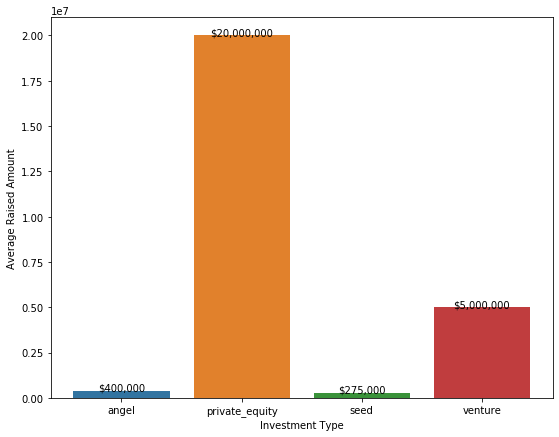

In [132]:
##Barplot of average money raised in each investment type
locale.setlocale(locale.LC_ALL, 'en_US')
fig = plt.figure(figsize=[9,7])
g =sns.barplot(x='funding_round_type',y='raised_amount_usd',data=groupedvalues)
g.set(xlabel='Investment Type',ylabel='Average Raised Amount')
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.raised_amount_usd, locale.format_string("$%d", row.raised_amount_usd, grouping=True), color='black', ha="center")
plt.plot()

[]

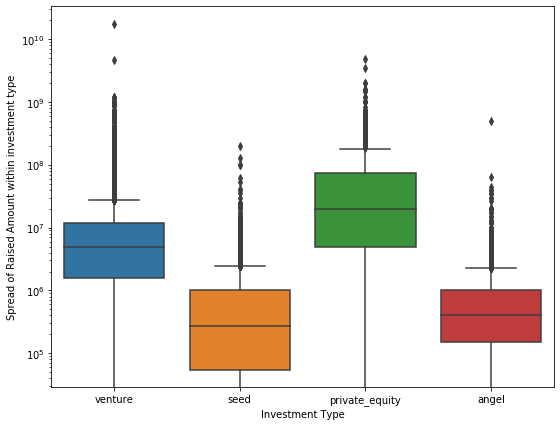

In [133]:
##boxplot to show distribution within each category which give sense how other investors invest
plt.figure(figsize=[9,7])
g =sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=master_frame[master_frame.funding_round_type.isin(['angel','seed','venture','private_equity'])])
g.set(xlabel='Investment Type',ylabel='Spread of Raised Amount within investment type')
g.set_yscale("log")
plt.plot()

**Pie chart of number of funds raised vs investment types in 5M to 15M range**

Text(0, 0.5, '')

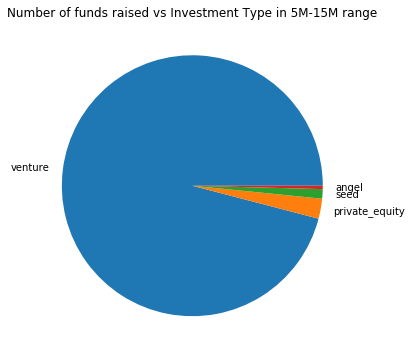

In [134]:
##below plot shows funds raised between 5M to 15M vs Investment Type
## as seen most investments in this range belong to Venture investment type
g = master_frame[(master_frame.funding_round_type.isin(['venture','seed','private_equity','angel'])) & ((master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000))].funding_round_type.value_counts().plot.pie(title='Number of funds raised vs Investment Type in 5M-15M range',figsize=(9, 6))
g.set_ylabel('')

**A plot showing the top 9 countries against the total amount of investments of funding type FT**

Below graph shows USA,GBR,IND are top 3 countries where English is official lanaguage. CHN dont have English as official language so not suitable for Spark investment criteria

In [135]:
master_frame_invtype.head(1)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND


In [136]:
temp = top9.groupby(by='country_code')['raised_amount_usd'].sum().reset_index()

[]

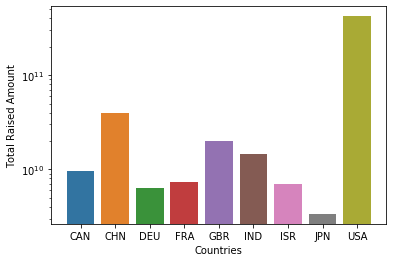

In [137]:
locale.setlocale(locale.LC_ALL, 'en_US')
g =sns.barplot(x='country_code',y='raised_amount_usd',data=temp)
g.set(xlabel='Countries',ylabel='Total Raised Amount')
g.set_yscale("log")
plt.plot()

**Plot showing the number of investments in the top 3 sectors of the top 3 countries**

Below graph gives pictorial view of comparison across sectors for top 3 countries

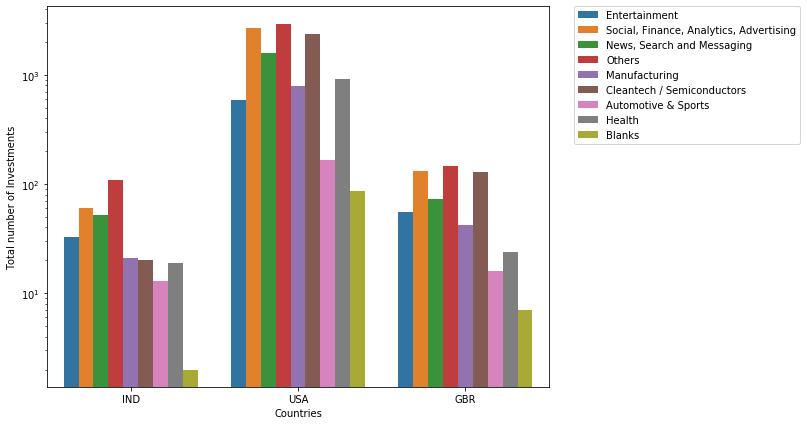

In [138]:
tempfinal = final[(final.raised_amount_usd>=5000000) & (final.raised_amount_usd<=15000000)]
plt.figure(figsize=[9,7])
g=sns.countplot(x='country_code',data=tempfinal,hue='main_sector')
g.set(xlabel='Countries',ylabel='Total number of Investments')
g.set_yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Below graph shows top 3 countries comparison across sectors. Number of investments gives sense of which are heavily invested sectors

In [139]:
pv = pd.pivot_table(data=final[(final.raised_amount_usd>=5000000) & (final.raised_amount_usd<=15000000)],index='main_sector',columns='country_code',values="funding_round_permalink", aggfunc='count')

[Text(32.999999999999986, 0.5, 'Sectors'), Text(0.5, 15.0, 'Countries')]

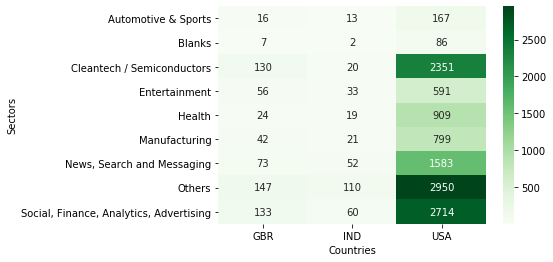

In [140]:
g =sns.heatmap(pv,cmap="Greens",annot=True,fmt='g')
g.set(xlabel='Countries',ylabel='Sectors')

**Others sector looks to be most popular across all three best suited countries so drilling down Others main sector further**

Most popular categories in Others sector for USA looks to be **software/Enterprise software/E-commerce**

In [141]:
D1[D1['main_sector']=='Others'].main_category_list.value_counts().head(10)

software               1044
enterprise software     642
e-commerce              273
security                203
web hosting             159
education                80
edtech                   51
technology               43
hospitality              39
networking               33
Name: main_category_list, dtype: int64

In [142]:
round(D1[D1['main_sector']=='Others'].groupby(by='main_category_list').sum()/1000000,2)['raised_amount_usd'].sort_values(ascending=False).head(10)

main_category_list
software               9125.72
enterprise software    5902.25
e-commerce             2381.51
security               1870.58
web hosting            1558.96
education               642.39
edtech                  455.34
technology              387.82
hospitality             323.75
networking              288.95
Name: raised_amount_usd, dtype: float64

In [143]:
round(D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='main_category_list').sum()/1000000,2)['raised_amount_usd'].sort_values(ascending=False).head(10)

main_category_list
advertising               5870.18
analytics                 4597.35
finance                   1460.54
big data                   745.03
android                    730.36
business services          627.19
collaboration              505.80
consulting                 484.63
ad targeting               382.23
information technology     364.42
Name: raised_amount_usd, dtype: float64

In [144]:
round(D1[D1['main_sector']=='News, Search and Messaging'].groupby(by='main_category_list').sum()/1000000,2)['raised_amount_usd'].sort_values(ascending=False).head(10)

main_category_list
mobile                 3887.29
curated web            2604.01
cloud computing        1789.73
apps                    974.26
messaging               611.97
internet                563.87
cloud security          306.41
search                  296.35
news                    262.57
cloud data services     251.87
Name: raised_amount_usd, dtype: float64

In [145]:
D1_plot  = round(D1[D1['main_sector']=='Others'].groupby(by='main_category_list').sum()/1000000,2)['raised_amount_usd'].sort_values(ascending=False).head(10)

[Text(0, 0.5, 'raised Amount in $M in USA'), Text(0.5, 0, 'Sectors in USA')]

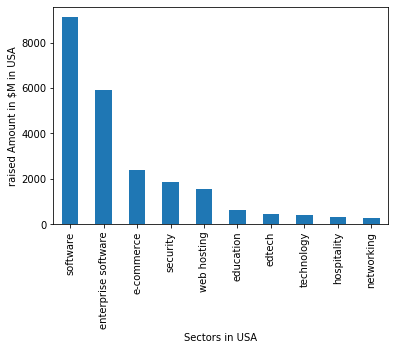

In [146]:
g = D1_plot.plot.bar(x='main_category_list', y='raised_amount_usd')
g.set(xlabel='Sectors in USA',ylabel='raised Amount in $M in USA')

Most popular categories in Others sector for GBR looks to be **software/E-commerce/Enterprise software**

In [147]:
D2[D2['main_sector']=='Others'].main_category_list.value_counts().head(10)

software               45
e-commerce             27
enterprise software    22
security               10
web hosting            10
hospitality             4
algorithms              3
education               3
technology              3
edtech                  2
Name: main_category_list, dtype: int64

In [148]:
round(D2[D2['main_sector']=='Others'].groupby(by='main_category_list').sum()/1000000,2)['raised_amount_usd'].sort_values(ascending=False).head(10)

main_category_list
software               383.82
e-commerce             262.64
enterprise software    182.81
web hosting             95.75
security                78.04
hospitality             31.51
technology              29.00
algorithms              25.56
education               22.06
document management     21.00
Name: raised_amount_usd, dtype: float64

In [149]:
round(D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='main_category_list').sum()/1000000,2)['raised_amount_usd'].sort_values(ascending=False).head(10)

main_category_list
advertising               306.79
finance                   142.90
customer service           50.50
analytics                  50.44
business services          46.11
financial services         41.84
brand marketing            41.70
accounting                 39.40
internet of things         28.32
information technology     27.60
Name: raised_amount_usd, dtype: float64

In [150]:
round(D2[D2['main_sector']=='News, Search and Messaging'].groupby(by='main_category_list').sum()/1000000,2)['raised_amount_usd'].sort_values(ascending=False).head(10)

main_category_list
mobile                   257.81
curated web              127.48
cloud computing           56.30
apps                      52.20
messaging                 34.05
application platforms     32.86
internet                  13.73
search                    11.02
gps                       10.00
domains                    8.30
Name: raised_amount_usd, dtype: float64

In [151]:
D2_plot  = round(D2[D2['main_sector']=='Others'].groupby(by='main_category_list').sum()/1000000,2)['raised_amount_usd'].sort_values(ascending=False).head(10)

[Text(0, 0.5, 'raised Amount in $M in GBR'), Text(0.5, 0, 'Sectors in GBR')]

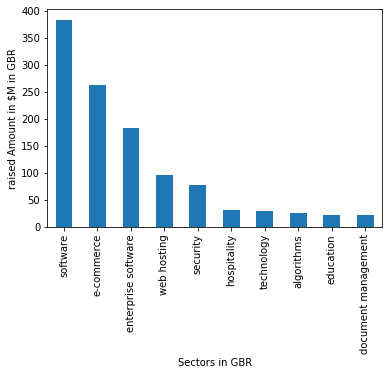

In [152]:
g = D2_plot.plot.bar(x='main_category_list', y='raised_amount_usd')
g.set(xlabel='Sectors in GBR',ylabel='raised Amount in $M in GBR')

Most popular categories in Others sector for IND looks to be **E-commerce/Software/Real estate**

In [153]:
D3[D3['main_sector']=='Others'].main_category_list.value_counts().head(10)

e-commerce             37
software               19
real estate             9
education               9
logistics               6
enterprise software     5
hospitality             5
edtech                  4
security                4
governments             2
Name: main_category_list, dtype: int64

In [154]:
round(D3[D3['main_sector']=='Others'].groupby(by='main_category_list').sum()/1000000,2)['raised_amount_usd'].sort_values(ascending=False).head(10)

main_category_list
e-commerce             343.87
software               163.05
real estate             91.40
education               80.35
logistics               47.40
enterprise software     44.30
edtech                  43.62
hospitality             42.00
security                37.40
gift card               25.00
Name: raised_amount_usd, dtype: float64

In [155]:
round(D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='main_category_list').sum()/1000000,2)['raised_amount_usd'].sort_values(ascending=False).head(10)

main_category_list
finance               126.01
analytics             103.00
advertising            50.00
consulting             41.94
financial services     31.00
consumer internet      30.00
collaboration          20.40
credit cards           19.00
credit                 15.00
career planning        15.00
Name: raised_amount_usd, dtype: float64

In [156]:
round(D3[D3['main_sector']=='News, Search and Messaging'].groupby(by='main_category_list').sum()/1000000,2)['raised_amount_usd'].sort_values(ascending=False).head(10)

main_category_list
mobile          128.49
curated web     110.18
internet         40.00
apps             38.67
messaging        21.00
delivery         21.00
classifieds      20.40
search           15.00
news             10.70
local search     10.00
Name: raised_amount_usd, dtype: float64

In [157]:
D3_plot  = round(D3[D3['main_sector']=='Others'].groupby(by='main_category_list').sum()/1000000,2)['raised_amount_usd'].sort_values(ascending=False).head(10)

[Text(0, 0.5, 'raised Amount in $M in IND'), Text(0.5, 0, 'Sectors in IND')]

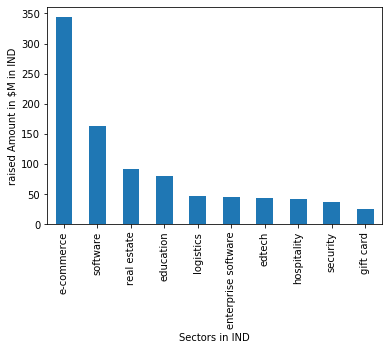

In [158]:
g = D3_plot.plot.bar(x='main_category_list', y='raised_amount_usd')
g.set(xlabel='Sectors in IND',ylabel='raised Amount in $M in IND')

# Conclusion

**Spark should invest in US/England/India in Venture capital in below sectors**
 - US/England - Social, Finance, Analytics, Adverting **OR** Cleantech,semiconductors **OR** software/E-commerce in others sector category
 - India -  Social, Finance, Analytics, Adverting **OR** News,Search and messaging **OR** E-commerce/software/real-estate in others sector category